In [1]:
import requests
requests.__version__

'2.25.1'

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Import the API key.
import requests
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5bde4eead1291cc6d39a9b70a812b061


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 13 | lucea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 13 | new glasgow
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 13 | mys shmidta
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 13 | vagur
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 13 | rikitea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 13 | trairi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 13 | necochea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 13 | mattru
-------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 14 | tsihombe
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 14 | mataura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 14 | samusu
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 14 | buchanan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 14 | santa fe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 14 | souillac
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 14 | flinders
-----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 15 | avera
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 15 | maningrida
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 15 | katsuura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 15 | namuac
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 15 | mount gambier
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 15 | male
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 15 | chuy
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 16 | suao
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 16 | zhuhai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 16 | samarai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 16 | ketchikan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 16 | sao filipe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 16 | resende
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 16 | lanxi
-----------------------------
Data Retrieval Complete   

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 17 | margate
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 17 | ocotitlan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 18 | mananjary
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 18 | nyurba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 18 | roald
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 18 | umm durman
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 18 | puerto narino
-----------------------------
Data Retrieval Compl

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 19 | hofn
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 19 | resistencia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 19 | buala
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 19 | saskylakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 19 | weligama
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 19 | cayenne
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 19 | havoysund
-----------------------------
Data Retrieval Complete      
-------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 20 | iquique
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 20 | shaunavon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 20 | yopal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 20 | riyadh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 20 | mount isa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 20 | celestun
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 20 | nguiu
City not found. Skipping...
-----------------------------
Data Retrieval Complete  

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 21 | puro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 21 | sambava
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 21 | zyryanka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 21 | mount pleasant
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 21 | kushiro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 21 | repatriacion
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 21 | labytnangi
-----------------------------
Data Retrieval Complete      
----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 22 | bandraboua
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 22 | lucapa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 22 | auki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 22 | saint-ambroise
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 22 | witu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 22 | gazli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 22 | fairbanks
-----------------------------
Data Retrieval Complete      
--------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 24 | basco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 24 | tonantins
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 24 | mezen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 24 | the valley
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 24 | rock springs
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 24 | eydhafushi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 24 | springbok
-----------------------------
Data Retrieval Complete      
-----------------

In [12]:
len(city_data)

552

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lucea,18.4510,-78.1736,78.85,68,55,1.68,JM,2021-05-30 20:06:54
1,New Glasgow,45.5834,-62.6486,49.93,85,100,7.96,CA,2021-05-30 20:06:54
2,Vagur,61.4732,-6.8119,48.25,92,0,21.25,FO,2021-05-30 20:05:01
3,Rikitea,-23.1203,-134.9692,75.36,71,96,12.35,PF,2021-05-30 20:02:30
4,Trairi,-3.2778,-39.2689,79.25,77,5,9.24,BR,2021-05-30 20:01:57
5,Necochea,-38.5473,-58.7368,55.04,45,70,11.36,AR,2021-05-30 20:06:55
6,Mattru,7.6244,-11.8332,75.72,96,100,2.82,SL,2021-05-30 20:06:55
7,Qaanaaq,77.4840,-69.3632,32.49,92,100,5.12,GL,2021-05-30 20:03:11
8,New Norfolk,-42.7826,147.0587,40.50,88,35,3.24,AU,2021-05-30 20:02:39
9,Pervomayskiy,53.2485,40.2871,45.12,92,100,12.93,RU,2021-05-30 20:06:56


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/30/21'

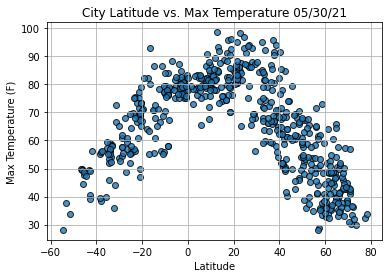

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

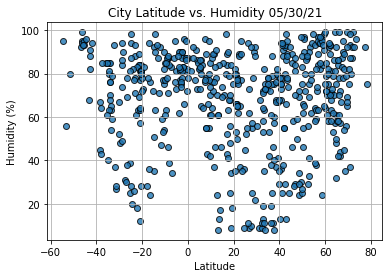

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,humidity,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

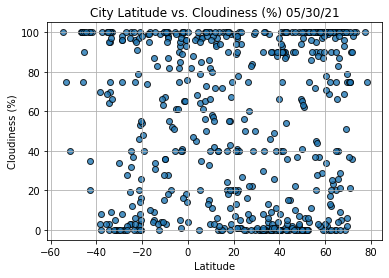

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,cloudiness,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

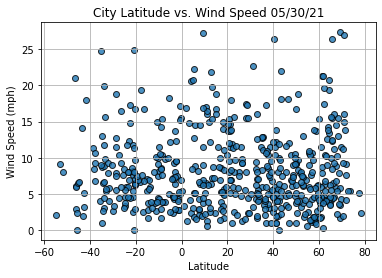

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

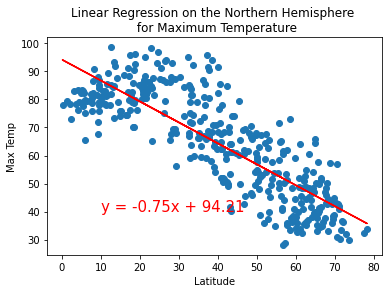

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


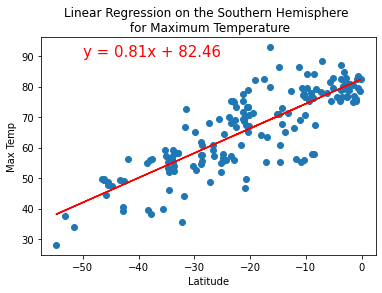

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

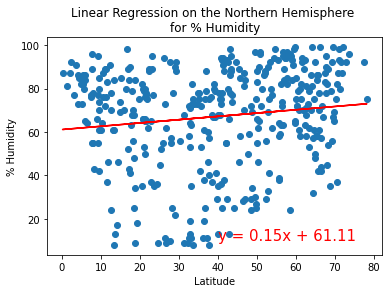

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

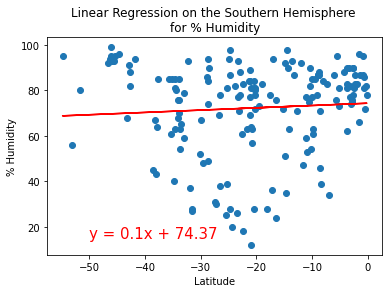

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

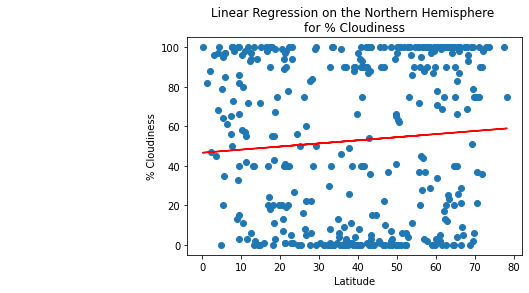

In [32]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

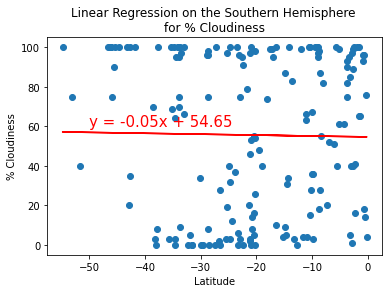

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

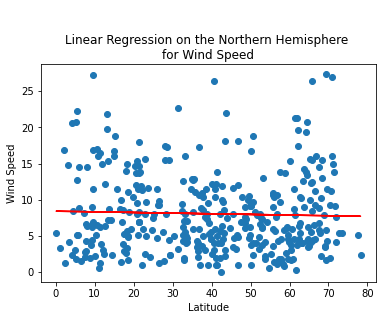

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

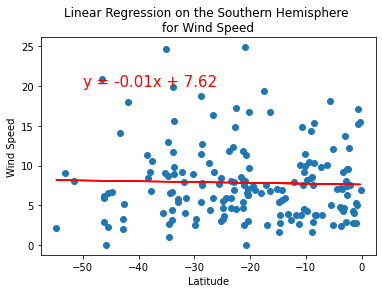

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))
